# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 10000)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

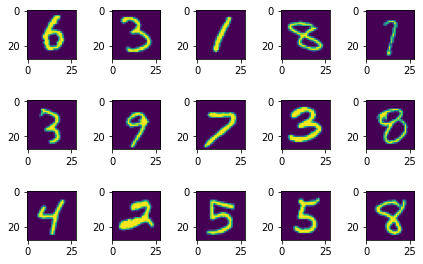

In [6]:
for i in range(1,16):
    plt.subplot(3, 5, i)
    plt.tight_layout()
    plt.imshow(np.reshape(X_train[i],(28,28)))

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

## Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)
y_predicted_NB = model_NB.predict(X_train)

accuracy_NB = metrics.accuracy_score(Y_train, y_predicted_NB)
confusionMatrix_NB = metrics.confusion_matrix(Y_train, y_predicted_NB)

## Simple Linear Model

In [8]:
from sklearn.linear_model import SGDClassifier

model_SLM = SGDClassifier(loss = "log")
model_SLM.fit(X_train, Y_train)
y_predicted_SLM = model_SLM.predict(X_train)

accuracy_SLM = metrics.accuracy_score(Y_train, y_predicted_SLM)
confusionMatrix_SLM = metrics.confusion_matrix(Y_train, y_predicted_SLM)

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

model_RF = RandomForestClassifier()
model_RF.fit(X_train, Y_train)
y_predicted_RF = model_RF.predict(X_train)

accuracy_RF = metrics.accuracy_score(Y_train, y_predicted_RF)
confusionMatrix_RF = metrics.confusion_matrix(Y_train, y_predicted_RF)

## Results

The results of the accuracy are : 
Accuracy of Naive Bayes :  0.56115 
Accuracy of Simple Linear Model :  0.8798666666666667 
Accuracy of Random Forest :  1.0


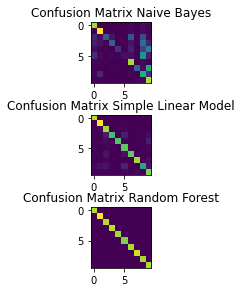

In [10]:
print("The results of the accuracy are : \nAccuracy of Naive Bayes : " , accuracy_NB
     , "\nAccuracy of Simple Linear Model : " , accuracy_SLM
     , "\nAccuracy of Random Forest : " , accuracy_RF)
fig, ax = plt.subplots(3)
plt.tight_layout()
ax[0].set_title("Confusion Matrix Naive Bayes")
ax[0].imshow(confusionMatrix_NB)
ax[1].set_title("Confusion Matrix Simple Linear Model")
ax[1].imshow(confusionMatrix_SLM)
ax[2].set_title("Confusion Matrix Random Forest")
ax[2].imshow(confusionMatrix_RF)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

## Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

y_predicted_NB = model_NB.predict(X_test)

accuracy_NB = metrics.accuracy_score(Y_test, y_predicted_NB)

In [12]:
F_NB = metrics.f1_score(Y_test, y_predicted_NB, average="micro")

In [27]:
fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve(Y_test, model_NB.predict_proba(X_test)[:,5], pos_label='5')

## Simple Linear Model

In [14]:
from sklearn.linear_model import SGDClassifier

y_predicted_SLM = model_SLM.predict(X_test)

accuracy_SLM = metrics.accuracy_score(Y_test, y_predicted_SLM)

In [15]:
F_SLM = metrics.f1_score(Y_test, y_predicted_SLM, average="micro")

In [16]:
fpr_SLM, tpr_SLM, thresholds_SLM = metrics.roc_curve(Y_test, model_SLM.decision_function(X_test)[:,5], pos_label='5')

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

y_predicted_RF = model_RF.predict(X_test)

accuracy_RF = metrics.accuracy_score(Y_test, y_predicted_RF)

In [18]:
F_RF = metrics.f1_score(Y_test, y_predicted_RF, average="micro")

In [19]:
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(Y_test, model_RF.predict_proba(X_test)[:,5], pos_label='5')

## Results

In [20]:
print("The results of the accuracy are : \nAccuracy of Naive Bayes : " , accuracy_NB
     , "\nAccuracy of Simple Linear Model : " , accuracy_SLM
     , "\nAccuracy of Random Forest : " , accuracy_RF)

The results of the accuracy are : 
Accuracy of Naive Bayes :  0.5596 
Accuracy of Simple Linear Model :  0.8632 
Accuracy of Random Forest :  0.9664


In [21]:
print("The results of the F-Measure are : \nF-Measure of Naive Bayes : " , F_NB
     , "\nF-Measure of Simple Linear Model : " , F_SLM
     , "\nF-Measure of Random Forest : " , F_RF)

The results of the F-Measure are : 
F-Measure of Naive Bayes :  0.5596 
F-Measure of Simple Linear Model :  0.8632 
F-Measure of Random Forest :  0.9664


Text(0.5, 1.0, 'ROC-Curve for class 5')

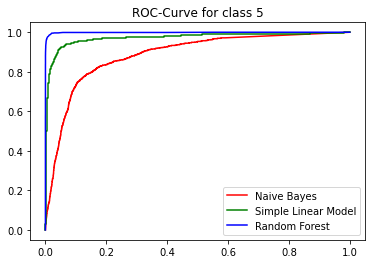

In [28]:
plt.plot(fpr_NB, tpr_NB, color='r')
plt.plot(fpr_SLM, tpr_SLM, color='g')
plt.plot(fpr_RF, tpr_RF, color='b')
plt.legend(["Naive Bayes", "Simple Linear Model","Random Forest"])
plt.title("ROC-Curve for class 5")